In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dt_train_2 = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Train.csv')

In [3]:
open_train_2 = dt_train_2.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
open_train_2 = scaler .fit_transform(open_train_2)
X_train_2 = open_train_2[0:1257]
y_train_2 = open_train_2[1:1258]
X_train_2 = np.reshape(X_train_2, (1257, 1, 1))

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [47]:
reg_2 = Sequential()

reg_2.add(LSTM(units = 32, return_sequences = True, input_shape = (X_train_2.shape[1], 1)))
reg_2.add(Dropout(0.2))

reg_2.add(LSTM(units = 32))
reg_2.add(Dropout(0.2))

reg_2.add(Dense(units = 1))

reg_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

reg_2.fit(X_train_2, y_train_2, batch_size = 32, epochs = 100)

Epoch 1/100
40/40 [==============================] - 4s 2ms/step - loss: 0.2794
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1171
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 13/100
40/40 [=================

In [48]:
dt_test_2 = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Test.csv')
real_price_2 = dt_test_2.iloc[:,1:2].values

In [49]:
value2 = real_price_2
value2 = scaler.transform(value2)
value2 = np.reshape(value2, (20, 1, 1))
predicted_price_2 = reg_2.predict(value2)
predicted_price_2 = scaler.inverse_transform(predicted_price_2)

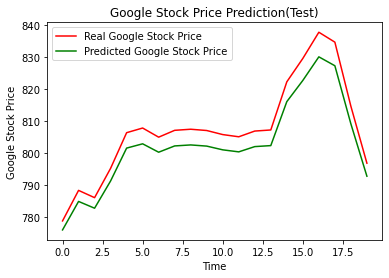

In [51]:
plt.plot(real_price_2, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price_2, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction(Test)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [52]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price_2, predicted_price_2))
print(rmse)

5.131120665768993


In [53]:
real_all_2 = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Train.csv')
real_all_2 = real_all_2.iloc[:,1:2].values
predicted_all_2 = reg_2.predict(X_train_2)
predicted_all_2 = scaler.inverse_transform(predicted_all_2)

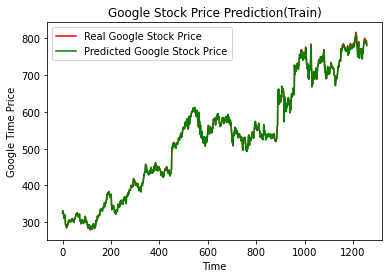

In [54]:
plt.plot(real_all_2, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_all_2, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction(Train)')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()
